Nome: Kleber Daniel Mattos Viana Matricula: 06007199

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
from pandas import read_csv

df = read_csv("data/train.csv", index_col=0)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [29]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
print(df.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [ ]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

/tmp/ipykernel_84148/1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [32]:
# df = df.dropna()

In [33]:
colunas_removiveis = ["Name", "Ticket", "Cabin", "Embarked"]
df.drop(colunas_removiveis, inplace=True, axis=1)

In [34]:
df["Sex"] = (df["Sex"] == "female").astype(int)

In [35]:
X = df.drop("Survived", axis=1)

In [36]:
y = df.Survived

In [37]:
clf = RandomForestClassifier(random_state=0)


In [38]:
clf.fit(X, y)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
index_da_linha = 2
input = X.loc[index_da_linha].values

print("esperado:", y.loc[index_da_linha])

resultado = clf.predict([input])[0]

print("adivinhado:", resultado)

esperado: 1
adivinhado: 1


/home/daniel/projects/DataScience/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


True Negatives (TN): 542
False Positives (FP): 7
False Negatives (FN): 9
True Positives (TP): 333

                precision    recall  f1-score   support

Não Sobreviveu       0.98      0.99      0.99       549
    Sobreviveu       0.98      0.97      0.98       342

      accuracy                           0.98       891
     macro avg       0.98      0.98      0.98       891
  weighted avg       0.98      0.98      0.98       891



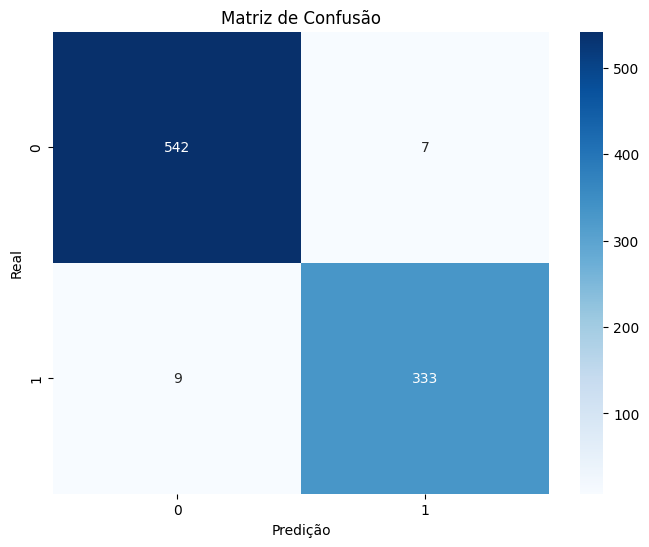

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = clf.predict(X)

matriz_confusao = confusion_matrix(y, y_pred)

# Extrair valores da matriz de confusão
TN, FP, FN, TP = matriz_confusao.ravel()

print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")
print()

# Também mostrar o relatório de classificação
print(classification_report(y, y_pred, target_names=["Não Sobreviveu", "Sobreviveu"]))

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues")

# # Adicionar anotações TN, FP, FN, TP nos quadrantes
# plt.text(
#     0.5,
#     0.25,
#     f"TN\n{TN}",
#     ha="center",
#     va="center",
#     fontsize=12,
#     fontweight="bold",
#     color="red",
# )
# plt.text(
#     1.5,
#     0.25,
#     f"FP\n{FP}",
#     ha="center",
#     va="center",
#     fontsize=12,
#     fontweight="bold",
#     color="red",
# )
# plt.text(
#     0.5,
#     1.25,
#     f"FN\n{FN}",
#     ha="center",
#     va="center",
#     fontsize=12,
#     fontweight="bold",
#     color="red",
# )
# plt.text(
#     1.5,
#     1.25,
#     f"TP\n{TP}",
#     ha="center",
#     va="center",
#     fontsize=12,
#     fontweight="bold",
#     color="red",
# )

plt.title("Matriz de Confusão")
plt.xlabel("Predição")
plt.ylabel("Real")
plt.show()


In [48]:
total = len(X)

acuracia = (TP + TN) / total

print(f"Acurácia de {acuracia:.2%}")

Acurácia de 98.20%


Parece que ficou bom 😊